In [160]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

competition_name = 'titanic'
dataset_path = 'datasets/titanic'
model_path = 'models'
predictions_path = 'predictions'

# Get the Data

In [2]:
import kaggle

def download_titanic():
    """downloads the titanic dataset"""
    
    # authenticate kaggle
    kaggle.api.authenticate()
    
    # create directory for the dataset if it doesn't exist
    if not os.path.isdir(dataset_path):
        os.makedirs(dataset_path)
    
    # download the files
    kaggle.api.competition_download_files(competition_name, dataset_path)

In [3]:
def load_titanic():
    """loads the titanic dataset"""
    
    titanic_train = pd.read_csv(os.path.join(dataset_path, 'train.csv'))
    titanic_test = pd.read_csv(os.path.join(dataset_path, 'test.csv'))
    return titanic_train, titanic_test

In [ ]:
# download the dataset
download_titanic()

In [4]:
# load the dataset
titanic_train, titanic_test = load_titanic()
print(titanic_train.shape)
print(titanic_test.shape)

(891, 12)
(418, 11)


In [5]:
# general dataset info
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
# look at some data
titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
# describe numerical attributes
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# categorical attributes
categorical_keys = ['Sex', 'Embarked', 'Pclass']
for key in categorical_keys:
    print(titanic_train[key].value_counts())
    print()

male      577
female    314
Name: Sex, dtype: int64

S    644
C    168
Q     77
Name: Embarked, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64



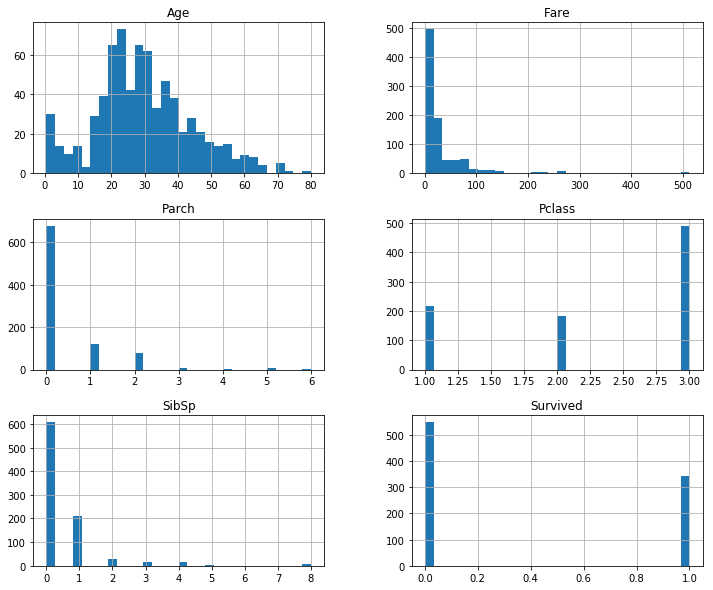

In [9]:
# numerical attribute histograms
titanic_train.drop(['PassengerId'], axis=1).hist(bins=30, figsize=(12, 10))
plt.plot();

In [10]:
def categorical_hists(data, cat_keys):
    plt.figure(figsize=(15, 5))
    for i, key in enumerate(cat_keys):
        plt.subplot(1, len(cat_keys), i+1)
        data[key].value_counts().plot(kind='bar')
        plt.title(key)
    plt.plot();

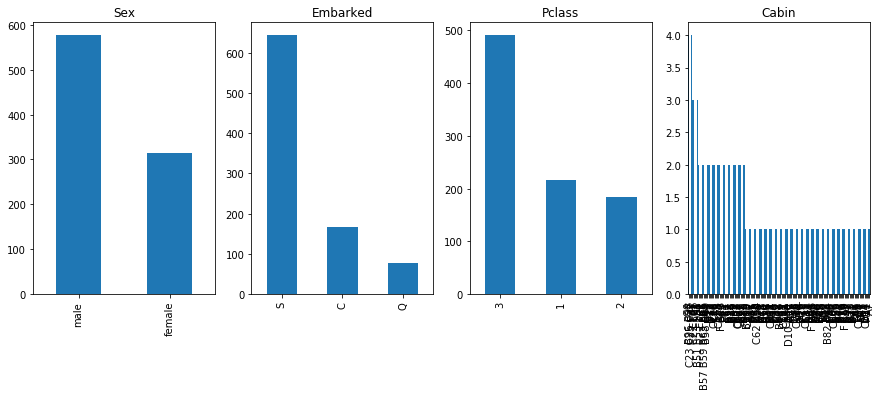

In [11]:
# categorical attribute histograms
categorical_keys = ['Sex', 'Embarked', 'Pclass', 'Cabin']
categorical_hists(titanic_train, categorical_keys)

In [12]:
# how many unique Cabin values
titanic_train['Cabin'].unique()

# the Cabin attribute doesn't seem very promising

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

# Discover and Visualize the Data

In [13]:
# find correlations in the data
corr_matrix = titanic_train.corr()
print(corr_matrix['Survived'].sort_values(ascending=False))

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


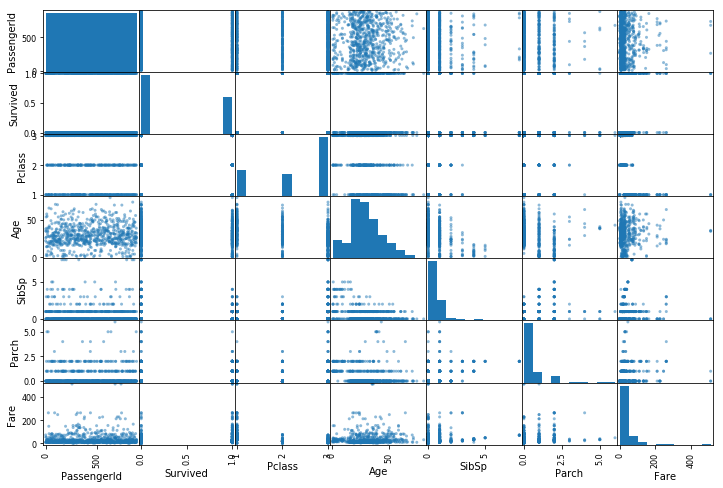

In [14]:
from pandas.plotting import scatter_matrix

scatter_matrix(titanic_train, figsize=(12, 8))
plt.plot();

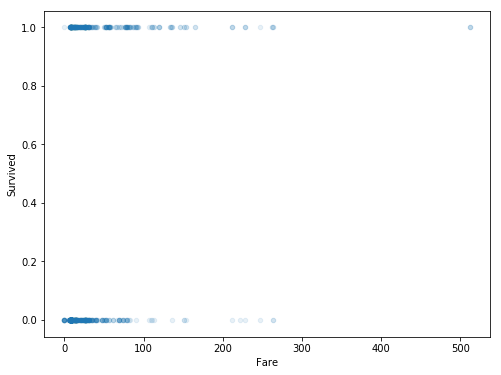

In [15]:
titanic_train.plot(kind="scatter", x='Fare', y='Survived', alpha=0.1, figsize=(8, 6))
plt.plot();

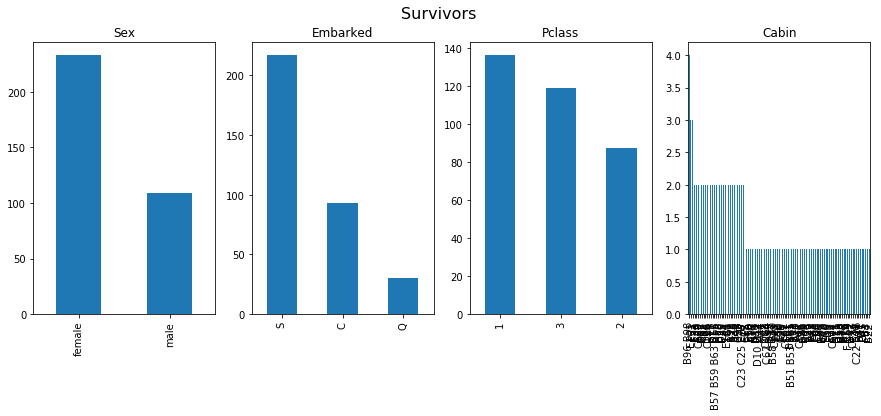

In [16]:
# who survived in each category?
survivors = titanic_train[titanic_train['Survived'] == 1]
categorical_hists(survivors, categorical_keys)
plt.suptitle("Survivors", size=16);

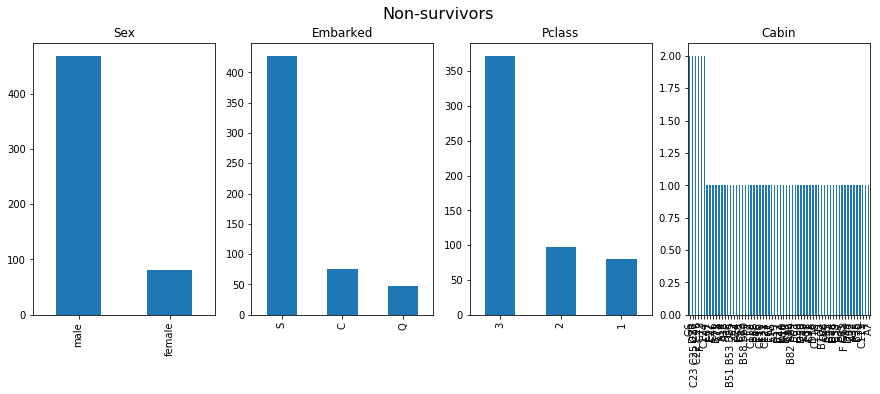

In [17]:
# who didn't survive in each category?
nonsurvivors = titanic_train[titanic_train['Survived'] == 0]
categorical_hists(nonsurvivors, categorical_keys)
plt.suptitle("Non-survivors", size=16);

In [18]:
# find percentage of survivors from each category
def survivor_percentage(data, attr, val):
    survivors = data[data['Survived'] == 1]
    return len(survivors[survivors[attr] == val])/len(data[data[attr] == val])

def show_percentages(data, attr):
    vals = data[attr].dropna().unique()
    for val in vals:
        perc = survivor_percentage(data, attr, val) * 100
        print(f"Percentage of ({attr}={val}) who survived: {perc:.2f}%")

In [19]:
# sex
show_percentages(titanic_train, 'Sex')

Percentage of (Sex=male) who survived: 18.89%
Percentage of (Sex=female) who survived: 74.20%


In [20]:
# embarked
show_percentages(titanic_train, 'Embarked')

Percentage of (Embarked=S) who survived: 33.70%
Percentage of (Embarked=C) who survived: 55.36%
Percentage of (Embarked=Q) who survived: 38.96%


In [21]:
# fare
show_percentages(titanic_train, 'Pclass')

Percentage of (Pclass=3) who survived: 24.24%
Percentage of (Pclass=1) who survived: 62.96%
Percentage of (Pclass=2) who survived: 47.28%


In [22]:
## new features
# age group
def add_agegroup(data):
    data = data.copy()
    data['AgeGroup'] = pd.cut(data['Age'], [0., 15., 40., np.inf], labels=['Child', 'Adult', 'Old'])
    return data
    
titanic_w_agegroup = add_agegroup(titanic_train)
print(titanic_w_agegroup['AgeGroup'].value_counts())

# number of family members
def add_family(data):
    data = data.copy()
    data['Family'] = data['SibSp'] + data['Parch']
    return data

titanic_w_family = add_family(titanic_train)
titanic_w_family['Family'].describe()

Adult    481
Old      150
Child     83
Name: AgeGroup, dtype: int64


count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: Family, dtype: float64

In [23]:
# age group percentages
show_percentages(titanic_w_agegroup, 'AgeGroup')

Percentage of (AgeGroup=Adult) who survived: 38.67%
Percentage of (AgeGroup=Old) who survived: 36.67%
Percentage of (AgeGroup=Child) who survived: 59.04%


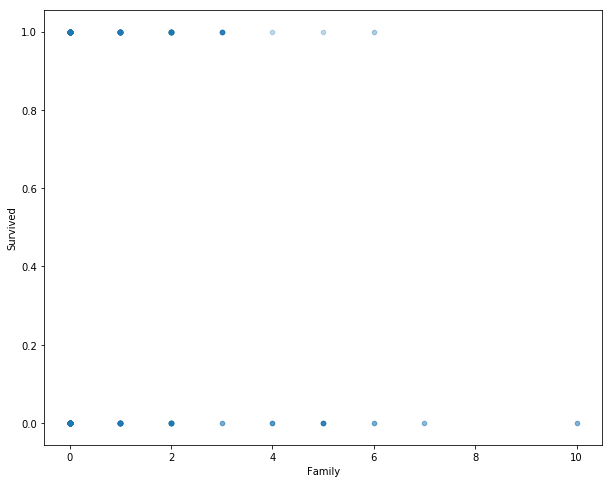

In [24]:
# family members correlation
titanic_w_family.plot(kind='scatter', x='Family', y='Survived', alpha=0.1, figsize=(10, 8))
plt.show();

# Data preparation

In [25]:
# raw data attributes
raw_keys = list(titanic_train.columns)
drop_keys = ['PassengerId', 'Name', 'Ticket', 'Cabin']
target_key = 'Survived'
cat_keys = ['Sex', 'Embarked', 'Pclass']
num_keys = list(titanic_train.columns.drop(cat_keys + drop_keys + [target_key]))
print(num_keys)

['Age', 'SibSp', 'Parch', 'Fare']


In [26]:
from sklearn.base import BaseEstimator, TransformerMixin

sibsp_ix = num_keys.index('SibSp')
parch_ix = num_keys.index('Parch')
age_ix = num_keys.index('Age')

# add new attributes
class AttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, family=True, agegroup=True):
        self.family = family
        self.agegroup = agegroup
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.family:
            family = X[:, sibsp_ix] + X[:, parch_ix]
            X = np.c_[X, family]
        if self.agegroup:
            agegroup = pd.cut(X[:, age_ix], [0., 15., 40., np.inf], labels=['Child', 'Adult', 'Old'])
            X = np.c_[X, agegroup]
        return X

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# impute numerical attributes, add new attributes
num_imputer_attr_adder = Pipeline([
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('attr_adder', AttributeAdder())
])

In [28]:
from sklearn.preprocessing import OneHotEncoder

# categorical attribute pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(categories='auto'))
])

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# new attribute column positions
new_keys = num_keys + ['Family', 'AgeGroup'] + cat_keys
new_num_keys = num_keys + ['Family']
new_cat_keys = cat_keys + ['AgeGroup']
new_num_ix = [new_keys.index(k) for k in new_num_keys]
new_cat_ix = [new_keys.index(k) for k in new_cat_keys]

# step 1
step1 = ColumnTransformer([
    ('num_imputer_attr_adder', num_imputer_attr_adder, num_keys),
    ('cat', 'passthrough', cat_keys),
])

# step 2
step2 = ColumnTransformer([
    ('num', StandardScaler(), new_num_ix),
    ('cat', cat_pipeline, new_cat_ix)
])

# full preparation pipeline
prepare_pipeline = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

In [96]:
# prepare the training data
titanic_y = titanic_train[target_key]
titanic_X = titanic_train.drop([target_key], axis=1)
titanic_X = prepare_pipeline.fit_transform(titanic_X)

/home/moaz/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/moaz/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# Select and Train a Model

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

def evaluate_model_train(model):
    """evaluate a classifier on the whole training set"""
    titanic_pred = model.predict(titanic_X)
    model_accuracy = accuracy_score(titanic_y, titanic_pred)
    model_log_loss = log_loss(titanic_y, titanic_pred)
    return {'accuracy': model_accuracy, 'log_loss': model_log_loss}

In [32]:
from sklearn.model_selection import cross_val_score

def cross_val(model, cv=10):
    # use cross-validation to have a better generalization error evaluate on K folds
    losses = -cross_val_score(model, titanic_X, titanic_y, scoring='neg_log_loss', cv=cv)
    print("Losses:", losses)
    print("Mean:", losses.mean())
    print("Standard deviation:", losses.std())

In [162]:
import joblib

def save_model(model, filename):
    if not os.path.isdir(model_path):
        os.makedirs(model_path)
    path = os.path.join(model_path, filename)
    joblib.dump(model, path)

def load_model(filename):
    path = os.path.join(model_path, filename)
    return joblib.load(path)

In [34]:
from sklearn.neural_network import MLPClassifier

# train and evaluate a multi-layer perceptron classifier
mlp = MLPClassifier(activation='logistic', random_state=42)
mlp.fit(titanic_X, titanic_y)
print(evaluate_model_train(mlp))

# k-fold cross validation
cross_val(mlp)

# save the model
save_model(mlp, 'mlp_base.pkl')

{'accuracy': 0.8114478114478114, 'log_loss': 6.512423800861592}


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Losses: [0.49464512 0.52995086 0.51720181 0.42593195 0.44640919 0.45658476
 0.44026056 0.47014724 0.40199526 0.41018797]
Mean: 0.45933147238406
Standard deviation: 0.041299382227365414


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [35]:
from sklearn.tree import DecisionTreeClassifier

# train and evaluate decision tree classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(titanic_X, titanic_y)
print(evaluate_model_train(tree_clf))

# k-fold cross validation
cross_val(tree_clf)

# save the model
save_model(tree_clf, 'tree_clf_base.pkl')

{'accuracy': 0.9820426487093153, 'log_loss': 0.6202267357053111}
Losses: [7.30336153 6.53649808 9.3369278  6.6032634  5.07926082 7.79410668
 5.85027317 8.16981191 6.63815093 5.89390235]
Mean: 6.9205556669643595
Standard deviation: 1.1927674792798024


In [36]:
from sklearn.ensemble import RandomForestClassifier

# train and evaluate a random forest classifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(titanic_X, titanic_y)
print(evaluate_model_train(forest_clf))

# k-fold cross validation
cross_val(forest_clf)

# save the model
save_model(forest_clf, 'forest_clf_base.pkl')

/home/moaz/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'accuracy': 0.9674523007856342, 'log_loss': 1.1241675769070063}
Losses: [2.71765584 1.80114121 3.4101429  1.81168877 1.04569754 1.4940662
 2.20274818 1.57566019 1.49444646 1.0888641 ]
Mean: 1.8642111389409433
Standard deviation: 0.6976918381451428


In [37]:
from sklearn.ensemble import AdaBoostClassifier

# train and evaluate an AdaBoost classifier
adaboost = AdaBoostClassifier(random_state=42)
adaboost.fit(titanic_X, titanic_y)
print(evaluate_model_train(adaboost))

# k-fold cross validation
cross_val(adaboost)

# the most important features
importances = pd.Series(adaboost.feature_importances_)
importances.sort_values(ascending=False, inplace=True)
print(importances)

# save the model
save_model(adaboost, 'adaboost_base.pkl')

{'accuracy': 0.8282828282828283, 'log_loss': 5.930964713623883}
Losses: [0.67486212 0.67485824 0.67078248 0.6729079  0.67441264 0.66955572
 0.6790015  0.67301467 0.67307402 0.66812401]
Mean: 0.6730593299374764
Standard deviation: 0.0029235071947066598
3     0.36
0     0.34
4     0.14
6     0.04
12    0.02
11    0.02
9     0.02
5     0.02
2     0.02
1     0.02
15    0.00
14    0.00
13    0.00
10    0.00
8     0.00
7     0.00
dtype: float64


In [38]:
from sklearn.svm import SVC

# train and evaluate a support vector machine classifier
svc = SVC(random_state=42, probability=True)
svc.fit(titanic_X, titanic_y)
print(evaluate_model_train(svc))

# k-fold cross validation
cross_val(svc)

# save the model
save_model(svc, 'svc_base.pkl')

{'accuracy': 0.8305274971941639, 'log_loss': 5.853424929609949}


/home/moaz/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/moaz/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/moaz/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/moaz/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196:

Losses: [0.47882497 0.40904132 0.54512672 0.38001523 0.43931234 0.49258066
 0.45325139 0.50814081 0.39412742 0.40797151]
Mean: 0.45083923785612556
Standard deviation: 0.05162830135792812


/home/moaz/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/moaz/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [39]:
from sklearn.neighbors import KNeighborsClassifier

# train and evaluate a K-nearest neighbors classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(titanic_X, titanic_y)
print(evaluate_model_train(knn_clf))

# k-fold cross validation
cross_val(knn_clf)

# save the model
save_model(knn_clf, 'knn_base.pkl')

{'accuracy': 0.8540965207631874, 'log_loss': 5.0393752076343326}
Losses: [2.60367515 2.19465478 4.88810048 1.82915448 1.43299304 1.86153462
 1.79486936 2.63300421 1.10900435 1.87269952]
Mean: 2.2219689981669934
Standard deviation: 0.9936521279208829


The most promising model are SVC, MLP, random forest and Adaboost.

# Fine-tune the selected models

### Fine-tuning Multi-layer Perceptron Classifier based on log loss

In [71]:
def evaluate_model(model):
    """Evaluate the model on training set and using cross validation"""
    
    print("Training:", evaluate_model_train(model))
    
    print("Cross-validation:")
    cross_val(model, cv=5)
    

In [66]:
from sklearn.model_selection import GridSearchCV

# the model type
mlp = MLPClassifier()

param_grid = {
    'hidden_layer_sizes': [(100,), (32, 32), (10, 10), (100, 100), (16, 16), (32,)],
    'activation': ['logistic', 'relu']
}

# perform grid search and evaluate using k-fold cross validation
grid_search = GridSearchCV(mlp, param_grid, scoring='neg_log_loss', cv=5, verbose=2)
grid_search.fit(titanic_X, titanic_y);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] activation=logistic, hidden_layer_sizes=(100,) ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... activation=logistic, hidden_layer_sizes=(100,), total=   0.8s
[CV] activation=logistic, hidden_layer_sizes=(100,) ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ... activation=logistic, hidden_layer_sizes=(100,), total=   1.1s
[CV] activation=logistic, hidden_layer_sizes=(100,) ..................
[CV] ... activation=logistic, hidden_layer_sizes=(100,), total=   1.1s
[CV] activation=logistic, hidden_layer_sizes=(100,) ..................
[CV] ... activation=logistic, hidden_layer_sizes=(100,), total=   0.9s
[CV] activation=logistic, hidden_layer_sizes=(100,) ..................
[CV] ... activation=logistic, hidden_layer_sizes=(100,), total=   0.7s
[CV] activation=logistic, hidden_layer_sizes=(32, 32) ................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] . activation=logistic, hidden_layer_sizes=(32, 32), total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(32, 32) ................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] . activation=logistic, hidden_layer_sizes=(32, 32), total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(32, 32) ................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] . activation=logistic, hidden_layer_sizes=(32, 32), total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(32, 32) ................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] . activation=logistic, hidden_layer_sizes=(32, 32), total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(32, 32) ................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] . activation=logistic, hidden_layer_sizes=(32, 32), total=   0.5s
[CV] activation=logistic, hidden_layer_sizes=(10, 10) ................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] . activation=logistic, hidden_layer_sizes=(10, 10), total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(10, 10) ................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] . activation=logistic, hidden_layer_sizes=(10, 10), total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(10, 10) ................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] . activation=logistic, hidden_layer_sizes=(10, 10), total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(10, 10) ................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] . activation=logistic, hidden_layer_sizes=(10, 10), total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(10, 10) ................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] . activation=logistic, hidden_layer_sizes=(10, 10), total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(100, 100) ..............


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=logistic, hidden_layer_sizes=(100, 100), total=   2.4s
[CV] activation=logistic, hidden_layer_sizes=(100, 100) ..............
[CV]  activation=logistic, hidden_layer_sizes=(100, 100), total=   1.4s
[CV] activation=logistic, hidden_layer_sizes=(100, 100) ..............
[CV]  activation=logistic, hidden_layer_sizes=(100, 100), total=   1.0s
[CV] activation=logistic, hidden_layer_sizes=(100, 100) ..............
[CV]  activation=logistic, hidden_layer_sizes=(100, 100), total=   2.1s
[CV] activation=logistic, hidden_layer_sizes=(100, 100) ..............
[CV]  activation=logistic, hidden_layer_sizes=(100, 100), total=   1.8s
[CV] activation=logistic, hidden_layer_sizes=(16, 16) ................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] . activation=logistic, hidden_layer_sizes=(16, 16), total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(16, 16) ................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] . activation=logistic, hidden_layer_sizes=(16, 16), total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(16, 16) ................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] . activation=logistic, hidden_layer_sizes=(16, 16), total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(16, 16) ................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] . activation=logistic, hidden_layer_sizes=(16, 16), total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(16, 16) ................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] . activation=logistic, hidden_layer_sizes=(16, 16), total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(32,) ...................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] .... activation=logistic, hidden_layer_sizes=(32,), total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(32,) ...................
[CV] .... activation=logistic, hidden_layer_sizes=(32,), total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(32,) ...................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] .... activation=logistic, hidden_layer_sizes=(32,), total=   0.4s
[CV] activation=logistic, hidden_layer_sizes=(32,) ...................
[CV] .... activation=logistic, hidden_layer_sizes=(32,), total=   0.3s
[CV] activation=logistic, hidden_layer_sizes=(32,) ...................
[CV] .... activation=logistic, hidden_layer_sizes=(32,), total=   0.3s
[CV] activation=relu, hidden_layer_sizes=(100,) ......................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ....... activation=relu, hidden_layer_sizes=(100,), total=   0.8s
[CV] activation=relu, hidden_layer_sizes=(100,) ......................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ....... activation=relu, hidden_layer_sizes=(100,), total=   0.8s
[CV] activation=relu, hidden_layer_sizes=(100,) ......................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ....... activation=relu, hidden_layer_sizes=(100,), total=   0.8s
[CV] activation=relu, hidden_layer_sizes=(100,) ......................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ....... activation=relu, hidden_layer_sizes=(100,), total=   0.8s
[CV] activation=relu, hidden_layer_sizes=(100,) ......................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ....... activation=relu, hidden_layer_sizes=(100,), total=   0.9s
[CV] activation=relu, hidden_layer_sizes=(32, 32) ....................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ..... activation=relu, hidden_layer_sizes=(32, 32), total=   0.4s
[CV] activation=relu, hidden_layer_sizes=(32, 32) ....................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ..... activation=relu, hidden_layer_sizes=(32, 32), total=   0.5s
[CV] activation=relu, hidden_layer_sizes=(32, 32) ....................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ..... activation=relu, hidden_layer_sizes=(32, 32), total=   0.5s
[CV] activation=relu, hidden_layer_sizes=(32, 32) ....................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ..... activation=relu, hidden_layer_sizes=(32, 32), total=   0.5s
[CV] activation=relu, hidden_layer_sizes=(32, 32) ....................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ..... activation=relu, hidden_layer_sizes=(32, 32), total=   0.4s
[CV] activation=relu, hidden_layer_sizes=(10, 10) ....................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ..... activation=relu, hidden_layer_sizes=(10, 10), total=   0.3s
[CV] activation=relu, hidden_layer_sizes=(10, 10) ....................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ..... activation=relu, hidden_layer_sizes=(10, 10), total=   0.3s
[CV] activation=relu, hidden_layer_sizes=(10, 10) ....................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ..... activation=relu, hidden_layer_sizes=(10, 10), total=   0.3s
[CV] activation=relu, hidden_layer_sizes=(10, 10) ....................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ..... activation=relu, hidden_layer_sizes=(10, 10), total=   0.3s
[CV] activation=relu, hidden_layer_sizes=(10, 10) ....................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ..... activation=relu, hidden_layer_sizes=(10, 10), total=   0.3s
[CV] activation=relu, hidden_layer_sizes=(100, 100) ..................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ... activation=relu, hidden_layer_sizes=(100, 100), total=   2.1s
[CV] activation=relu, hidden_layer_sizes=(100, 100) ..................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ... activation=relu, hidden_layer_sizes=(100, 100), total=   1.6s
[CV] activation=relu, hidden_layer_sizes=(100, 100) ..................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ... activation=relu, hidden_layer_sizes=(100, 100), total=   1.9s
[CV] activation=relu, hidden_layer_sizes=(100, 100) ..................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ... activation=relu, hidden_layer_sizes=(100, 100), total=   2.0s
[CV] activation=relu, hidden_layer_sizes=(100, 100) ..................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ... activation=relu, hidden_layer_sizes=(100, 100), total=   2.1s
[CV] activation=relu, hidden_layer_sizes=(16, 16) ....................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ..... activation=relu, hidden_layer_sizes=(16, 16), total=   0.4s
[CV] activation=relu, hidden_layer_sizes=(16, 16) ....................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ..... activation=relu, hidden_layer_sizes=(16, 16), total=   0.4s
[CV] activation=relu, hidden_layer_sizes=(16, 16) ....................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ..... activation=relu, hidden_layer_sizes=(16, 16), total=   0.4s
[CV] activation=relu, hidden_layer_sizes=(16, 16) ....................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ..... activation=relu, hidden_layer_sizes=(16, 16), total=   0.4s
[CV] activation=relu, hidden_layer_sizes=(16, 16) ....................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ..... activation=relu, hidden_layer_sizes=(16, 16), total=   0.4s
[CV] activation=relu, hidden_layer_sizes=(32,) .......................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ........ activation=relu, hidden_layer_sizes=(32,), total=   0.3s
[CV] activation=relu, hidden_layer_sizes=(32,) .......................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ........ activation=relu, hidden_layer_sizes=(32,), total=   0.3s
[CV] activation=relu, hidden_layer_sizes=(32,) .......................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ........ activation=relu, hidden_layer_sizes=(32,), total=   0.3s
[CV] activation=relu, hidden_layer_sizes=(32,) .......................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV] ........ activation=relu, hidden_layer_sizes=(32,), total=   0.3s
[CV] activation=relu, hidden_layer_sizes=(32,) .......................


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   42.1s finished
/home/moaz/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[CV] ........ activation=relu, hidden_layer_sizes=(32,), total=   0.3s


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [72]:
# best MLP model
best_mlp = grid_search.best_estimator_
save_model(best_mlp, 'mlp_best.pkl')

In [73]:
# evaluate the model
evaluate_model(best_mlp)

Training: {'accuracy': 0.8439955106621774, 'log_loss': 5.388231993729429}
Cross-validation:


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

Losses: [0.44991239 0.48939834 0.39446228 0.42737218 0.35883453]
Mean: 0.42399594427529896
Standard deviation: 0.04489717503696041


/home/moaz/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [74]:
# best MLP hyperparameters
grid_search.best_params_

{'activation': 'relu', 'hidden_layer_sizes': (32,)}

### Fine-tuning Random Forest Classifier

In [88]:
# the model type
forest_clf = RandomForestClassifier(random_state=42)

forest_param_grid = {
    'n_estimators': [5, 10, 20, 50, 100, 200, 400]
}

# perform grid search and evaluate using k-fold cross validation
forest_grid_search = GridSearchCV(forest_clf, forest_param_grid, scoring='neg_log_loss', cv=5, verbose=2)
forest_grid_search.fit(titanic_X, titanic_y);

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] n_estimators=5 ..................................................
[CV] ................................... n_estimators=5, total=   0.0s
[CV] n_estimators=5 ..................................................
[CV] ................................... n_estimators=5, total=   0.0s
[CV] n_estimators=5 ..................................................
[CV] ................................... n_estimators=5, total=   0.0s
[CV] n_estimators=5 ..................................................
[CV] ................................... n_estimators=5, total=   0.0s
[CV] n_estimators=5 ..................................................
[CV] ................................... n_estimators=5, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................. n_estimators=20, total=   0.0s
[CV] n_estimators=20 .................................................
[CV] .................................. n_estimators=20, total=   0.0s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   0.0s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   0.0s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   0.0s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   0.0s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   0.0s
[CV] n_estimators=100 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    4.0s finished
/home/moaz/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [89]:
# best random forest model
best_forest = forest_grid_search.best_estimator_
save_model(best_forest, 'forest_clf_best.pkl')

In [90]:
# evaluate the model
evaluate_model(best_forest)

Training: {'accuracy': 0.9820426487093153, 'log_loss': 0.6202294279525508}
Cross-validation:
Losses: [1.01923201 1.29701917 0.55887807 0.51835869 0.58789504]
Mean: 0.7962765971749858
Standard deviation: 0.3090215341008624


In [91]:
# best random forest hyperparameters
forest_grid_search.best_params_

{'n_estimators': 400}

### Fine-tuning AdaBoost Classifier

In [79]:
# the model type
adaboost = AdaBoostClassifier(random_state=42)

adaboost_param_grid = {
    'n_estimators': [5, 10, 20, 50, 100, 200, 400]
}

# perform grid search and evaluate using k-fold cross validation
adaboost_grid_search = GridSearchCV(adaboost, adaboost_param_grid, scoring='neg_log_loss', cv=5, verbose=2)
adaboost_grid_search.fit(titanic_X, titanic_y);

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] n_estimators=5 ..................................................
[CV] ................................... n_estimators=5, total=   0.0s
[CV] n_estimators=5 ..................................................
[CV] ................................... n_estimators=5, total=   0.0s
[CV] n_estimators=5 ..................................................
[CV] ................................... n_estimators=5, total=   0.0s
[CV] n_estimators=5 ..................................................
[CV] ................................... n_estimators=5, total=   0.0s
[CV] n_estimators=5 ..................................................
[CV] ................................... n_estimators=5, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................. n_estimators=20, total=   0.0s
[CV] n_estimators=20 .................................................
[CV] .................................. n_estimators=20, total=   0.0s
[CV] n_estimators=20 .................................................
[CV] .................................. n_estimators=20, total=   0.0s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   0.0s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   0.0s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   0.0s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   0.0s
[CV] n_estimators=50 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    4.5s finished


In [81]:
# best AdaBoost model
best_adaboost = adaboost_grid_search.best_estimator_
save_model(best_adaboost, 'adaboost_best.pkl')

In [82]:
# evaluate the model
evaluate_model(best_adaboost)

Training: {'accuracy': 0.7968574635241302, 'log_loss': 7.016382590378218}
Cross-validation:
Losses: [0.5980401  0.59569117 0.58436795 0.5998155  0.58481075]
Mean: 0.5925450943055158
Standard deviation: 0.0066277840807609355


In [83]:
# best AdaBoost hyperparameters
adaboost_grid_search.best_params_

{'n_estimators': 5}

### Fine-tuning Support Vector Machine Classifier

In [52]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats

# the model type
svc = SVC(probability=True)

# support vector machine classifier hyperparameter distributions
param_distributions = {
    'kernel': ['linear', 'rbf'],
    'C': scipy.stats.reciprocal(20, 200000),
    'gamma': scipy.stats.expon(scale=1.0)
}

# perform randomized hyperparameter search and evaluate using k-fold cross validation
rand_search = RandomizedSearchCV(svc, param_distributions=param_distributions, n_iter=5,
                                 scoring='neg_log_loss', cv=5, verbose=2, random_state=42)
rand_search.fit(titanic_X, titanic_y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=  18.9s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.9s remaining:    0.0s


[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=  23.4s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......
[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=  42.2s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......
[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total=  33.5s
[CV] C=629.782329591372, gamma=3.010121430917521, kernel=linear ......
[CV]  C=629.782329591372, gamma=3.010121430917521, kernel=linear, total= 1.5min
[CV] C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf ......
[CV]  C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf, total=   8.1s
[CV] C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf ......
[CV]  C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf, total=  25.3s
[CV] C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf ......
[CV]  C=26290.206464300216, gamma=0.9084469696321253, kernel=rbf, total=   5.1s
[CV] C=26290.2

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  7.0min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=5, n_jobs=None,
          param_distributions={'kernel': ['linear', 'rbf'], 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1ac8410668>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f1ac840eeb8>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_log_loss', verbose=2)

In [92]:
# best SVC estimator
best_svc = rand_search.best_estimator_
save_model(best_svc, 'svc_best.pkl')

{'accuracy': 0.8608305274971941, 'log_loss': 4.806763034918506}


In [93]:
# evaluate the model
evaluate_model(best_svc)

Training: {'accuracy': 0.8608305274971941, 'log_loss': 4.806763034918506}
Cross-validation:
Losses: [0.48765421 0.47847439 0.44854543 0.50141592 0.40371477]
Mean: 0.46396094538802785
Standard deviation: 0.034762409609482015


In [54]:
# best SVC hyperparameters
rand_search.best_params_

{'C': 84.14107900575871, 'gamma': 0.059838768608680676, 'kernel': 'rbf'}

The best model is RandomForestClassifier with n_features=400.

# Evaluate the best model on the test set

In [156]:
def save_predictions(predictions, filename):
    if not os.path.isdir(predictions_path):
        os.makedirs(predictions_path)
    path = os.path.join(predictions_path, filename)
    predictions.to_csv(path, index=False)

In [163]:
# the best random forest classifier
best_model = load_model('forest_clf_best.pkl')

In [164]:
# make some predictions
some_X = titanic_train[:5].drop(target_key, axis=1)
some_y = titanic_train[:5][target_key]
predictions = best_model.predict(prepare_pipeline.transform(some_X))

print("Predictions:\t", predictions)
print("Targets:\t", some_y.values)
print("Accuracy:\t", accuracy_score(some_y, predictions))
print(f"Log Loss:\t{log_loss(some_y, predictions): .2f}")

Predictions:	 [0 1 1 1 0]
Targets:	 [0 1 1 1 0]
Accuracy:	 1.0
Log Loss:	 0.00


/home/moaz/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [165]:
# predict the test set targets
test_X = titanic_test
predictions = best_model.predict(prepare_pipeline.transform(test_X))

# store in a dataframe
test_survived = pd.DataFrame({
    'PassengerId': test_X['PassengerId'],
    'Survived': predictions
})

# save the predictions to a CSV file
save_predictions(test_survived, 'best_forest_survived.csv')

/home/moaz/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [169]:
def submit_predictions_to_kaggle(filename, message="Submission"):
    path = os.path.join(predictions_path, filename)
    kaggle.api.authenticate()
    kaggle.api.competition_submit(path, message=message, competition=competition_name)

In [172]:
# submit random forest classifier predictions to the Kaggle competition
submit_predictions_to_kaggle('best_forest_survived.csv', message="Random Forest Classifier Predictions")

100%|██████████| 2.77k/2.77k [00:00<00:00, 14.1kB/s]
